In [1]:
%matplotlib notebook
%matplotlib inline 

Intitulé:

Qu'est-ce que les discours politiques peuvent nous révéler de la stratégie d'un ou d'une candidate à la campagne présidentielle ? Le cas Eric Zemmour 

Questions:

_ Dans quelle mesure le lieu du meeting influence-t-il le contenu du discours ?
Méthode: nous représenterons les textes vectoriellement puis nous conduirons une analyse de clustering pour voir si les discours les plus similaires sont prononcés dans des villes partageant des caractéristiques socio-démographiques communes (campagne vs villes historiques de la droite par exemple) ?
=> 

_ A quel point  le champ sémantique de la France développé dans chacun de ses discours est influencé par l'histoire et la situation sociodémographique de la ville où il est ? Dans quelle mesure Zemmour intègre-t-il son public immédiat dans chacun de ses discours ?
Word2Vec : comment le champ lexical qui permet de prédire le mot France évolue avec les catactéristiques de la ville dans laquelle Zemmour tient son meeting.
=> Word2Vec Skip-Gram Model



=> Attention Mechanism for Sequence Classification (Slide 69)

_ Bonus:
 N-Gram Language Models pour deux ou trois clusters de discours
 + Transfer Learning with BERT-like Model

#Import des packages

In [2]:
! pip install unidecode
! pip install nltk

     |████████████████████████████████| 235 kB 23.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import re

from pandas_profiling import ProfileReport
import unidecode

In [ ]:
import nltk
from string import punctuation

nltk.download("stopwords")
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from wordcloud import WordCloud
import unicodedata

Importer les données
- Importer tous les discours
- Créer un dataframe rassemblant tous les discours par ville et par date
Nettoyer les données

Clustering

#Import des données

In [4]:
### Téléchargement des données

from google.colab import files 
uploaded = files.upload()

In [ ]:
liste_discours=["Agen_Z.csv",'Villepinte_Z.csv','Calais_Z.csv','Cannes_Z.csv','Chambery_Z.csv','Chateaudun_Z.csv','Lille_Z.csv',
                'Montsaintmichel_Z.csv','Sables_dolonnes_Z.csv','Saintquentin_Z.csv','Saulieu_Z.csv','Sologne_Z.csv',"Toulon_Z.csv","Femmes_Z.csv",
                "Presse_Z.csv","Défense_Z.csv","Trocadero_Z.csv"]


In [ ]:
### Constitution de la base de données totale


dico_Z={}


for discours in liste_discours:
  df = pd.read_csv(discours,sep=';',encoding="windows-1252", engine='python') #, error_bad_lines=False)
  
  
  
  #contenu = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array
  contenu_init = df.content.apply(lambda x: x.replace("?",""))
  contenu=contenu_init.apply(lambda x: x.split(' ')).array
    
  flat_list = itertools.chain(*contenu)
  flat_list=list(flat_list)

  texte = '' 
  for val in flat_list:

    texte += "".join(str(val))+" "

  dico_Z[discours]=texte

base_recapitulative=pd.DataFrame(dico_Z.values(),dico_Z.keys())
base_recapitulative.rename(columns={0:"Discours"},inplace=True)
base_recapitulative["Lieu"]=base_recapitulative.index.str.split("_")
base_recapitulative["Lieu"]=base_recapitulative.index.str.split("_").array
base_recapitulative

,Discours,Lieu
Agen_Z.csv,Bonjour Agen ! Bonjour mes chers amis ! Bonjou...,"[Agen, Z.csv]"
Villepinte_Z.csv,"Bonjour a tous, bonjour mes amis… Merci de vot...","[Villepinte, Z.csv]"
Calais_Z.csv,"Bonjour à tous, merci pour votre présence. Nou...","[Calais, Z.csv]"
Cannes_Z.csv,"Merci, mes amis, merci ! Du fond du cœur ! Vot...","[Cannes, Z.csv]"
Chambery_Z.csv,"Bonjour, chers amis ! Bonjour et merci, merci...","[Chambery, Z.csv]"
Chateaudun_Z.csv,"Mes chers amis, mesdames et messieurs les élus...","[Chateaudun, Z.csv]"
Lille_Z.csv,"Bonjour à tous, chers amis ! Quel plaisir d’êt...","[Lille, Z.csv]"
Montsaintmichel_Z.csv,"Chers amis ! Nous avons bravé le froid, nous a...","[Montsaintmichel, Z.csv]"
Sables_dolonnes_Z.csv,"Bonjour à tous ! Merci beaucoup, merci… Décidé...","[Sables, dolonnes, Z.csv]"
Saintquentin_Z.csv,"Bonjour à tous, bonjour mes amis ! Quelle pass...","[Saintquentin, Z.csv]"


In [ ]:
### Base à compléter à la main pour les dimensions géographiques, démographiques et temporelles

base_recapitulative["Ville"]=[i[0] for i in base_recapitulative.index.str.split("_").array]
base_recapitulative["Coordonnées"]=""
base_recapitulative["Date"]=""
del base_recapitulative["Lieu"]
base_recapitulative.reset_index(drop=True,inplace=True)
base_recapitulative.to_csv("Base_totale_Z.csv")

base_recapitulative

,Discours,Ville,Coordonnées,Date
0,Bonjour Agen ! Bonjour mes chers amis ! Bonjou...,Agen,,
1,"Bonjour a tous, bonjour mes amis… Merci de vot...",Villepinte,,
2,"Bonjour à tous, merci pour votre présence. Nou...",Calais,,
3,"Merci, mes amis, merci ! Du fond du cœur ! Vot...",Cannes,,
4,"Bonjour, chers amis ! Bonjour et merci, merci...",Chambery,,
5,"Mes chers amis, mesdames et messieurs les élus...",Chateaudun,,
6,"Bonjour à tous, chers amis ! Quel plaisir d’êt...",Lille,,
7,"Chers amis ! Nous avons bravé le froid, nous a...",Montsaintmichel,,
8,"Bonjour à tous ! Merci beaucoup, merci… Décidé...",Sables,,
9,"Bonjour à tous, bonjour mes amis ! Quelle pass...",Saintquentin,,


In [ ]:
"""
!pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

!pip install -U pandas-profiling

import pandas_profiling as pp
from pandas_profiling import ProfileReport


# Let's create an automatic and interactive report of the BBC News dataset
profile = ProfileReport(base_recapitulative, title="Les discours de Zemmour", html={"style": {"full_width": True}})

---------
import folium

france = folium.Map(location = [48, 2], zoom_start = 5)


centroid=[50.6365654,3.0635282]
  

folium.Marker(centroid,popup = "zoz",tooltip = "Click for more").add_to(france)

france
----------
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# Let's create an automatic and interactive report of the BBC News dataset


from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored


profile = ProfileReport(df, content="Discours", html={"style": {"full_width": True}})
profile.to_notebook_iframe()
"""

'\n!pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip\n\n!pip install -U pandas-profiling\n\nimport pandas_profiling as pp\nfrom pandas_profiling import ProfileReport\n\n\n# Let\'s create an automatic and interactive report of the BBC News dataset\nprofile = ProfileReport(base_recapitulative, title="Les discours de Zemmour", html={"style": {"full_width": True}})\n\n---------\nimport folium\n\nfrance = folium.Map(location = [48, 2], zoom_start = 5)\n\n\ncentroid=[50.6365654,3.0635282]\n  \n\nfolium.Marker(centroid,popup = "zoz",tooltip = "Click for more").add_to(france)\n\nfrance\n----------\n! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip\n# Let\'s create an automatic and interactive report of the BBC News dataset\n\n\nfrom pandas_profiling import ProfileReport\n\nfrom functools import reduce\nfrom operator import add\nfrom termcolor import colored\n\n\nprofile = ProfileReport(df, content="Discours", html={"styl

In [ ]:
#profile.to_notebook_iframe()

# Nettoyage des données

In [ ]:
### Un discours en particulier comme exemple

discours="Toulon_Z.csv" #liste_discours[3]

df = pd.read_csv(discours,sep=';',encoding="windows-1252") 

print("Shape:  {0}".format(df.shape))
df["content"]

#.split(" ")


Shape:  (139, 1)


0                                      Bonjour, Toulon !
1                          Bonjour, chers amis ! Merci !
2                 Merci d’être si nombreux aujourd’hui !
3      Merci à Marion qui nous rejoint ! Marion, quel...
4      Ma chère Marion, nous nous connaissons depuis ...
                             ...                        
134                 La France indépendante, c’est nous !
135          La France belle et souveraine, c’est nous !
136      La France qui va rester la France, c’est nous !
137                          La Reconquête, c’est nous !
138    Vive le courage dans l’épreuve, vive la grande...
Name: content, Length: 139, dtype: object

In [ ]:
### Transformation en texte

def Transformation_texte(flatlist):
  """
  Cette fonction permet de transformer une liste de mots en texte
  """
  texte = '' 
  for val in flatlist:

    #texte += "".join(unidecode.unidecode(val))+" "
    texte += "".join(unidecode.unidecode(val))+" "
  return(texte)

#texte_df=Transformation_texte(flat_list)  

### Nous retirons les mots inutiles
from nltk.corpus import stopwords
stopwords = stopwords.words('french')

autres_stopwords=["ni","était","si","car","cette","plus","alors","chaque","a","quel","quelque","chacun","parce","\’", "\«", "\»"]
french_stopwords=set(list(stopwords)+autres_stopwords+list(punctuation))


def Retirer_mots_inutiles(texte_brut):
  """
  Cette fonction permet de nettoyer un texte des mots superflus 
  """
  filtre_stopfr =  lambda text: [token for token in text if token.lower() not in french_stopwords]


  texte_filtre=filtre_stopfr(word_tokenize(texte_brut, language="french") )
  texte = '' 
  for val in texte_filtre:

    texte += "".join(str(val))+" "


  return(texte)

#Retirer_mots_inutiles(texte_df)

In [ ]:
### Nous voulons comparer différentes de méthodes de tokenization pour choisir celle qui est la plus appropriée

Dictionnaire_token={}


### Méthode 1: mous créons une liste de chaque mot du texte

import itertools
#contenu = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array
contenu_init = df.content.apply(lambda x: x.replace("?",""))
contenu=contenu_init.apply(lambda x: x.split(' ')).array

flat_list = itertools.chain(*contenu)
flat_list=list(flat_list)
Dictionnaire_token["Liste"]=flat_list

### Méthode 2: tokenization

from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
import pdb # python debugger


for tok in tqdm(tokenizers):
  print('Using tokenizer: %s' % (tok))
  #contenu = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array
  contenu_init = df.content.apply(lambda x: x.replace("?",""))
  arr=contenu_init.apply(lambda x: tok.tokenize(x)).array

  #arr = df.content.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  flat_list = [ x for X in arr for x in X]
  Dictionnaire_token[tok]=flat_list

  0%|          | 0/3 [00:00<?, ?it/s]

Using tokenizer: <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7f29f746b650>
Using tokenizer: <nltk.tokenize.toktok.ToktokTokenizer object at 0x7f29f75426d0>
Using tokenizer: <nltk.tokenize.casual.TweetTokenizer object at 0x7f29f75fc590>


In [ ]:
### On veut créer un dictionnaire associant pour chaque méthode de tokenization le texte tokenisé


a= list(Dictionnaire_token.keys())[1]
b= list(Dictionnaire_token.keys())[2]
c= list(Dictionnaire_token.keys())[3]

Dictionnaire_token["treebank"]= Dictionnaire_token[a]
Dictionnaire_token["toktok"]= Dictionnaire_token[b]
Dictionnaire_token["tweet"]= Dictionnaire_token[c]

for cle in [a,b,c]:
  del Dictionnaire_token[cle]

### Nettoyage des discours
Dictionnaire_texte={}

for methode in Dictionnaire_token.keys():
  flatliste_methode=Dictionnaire_token[methode]
  t1=Transformation_texte(flatliste_methode)
  t2=Retirer_mots_inutiles(t1)
  print(t1==t2)
  Dictionnaire_texte[methode]=t2 

cle1=list(Dictionnaire_texte.keys())[0]
cle2=list(Dictionnaire_texte.keys())[1]
cle3=list(Dictionnaire_texte.keys())[2]
cle4=list(Dictionnaire_texte.keys())[3]

texte1=Dictionnaire_texte[cle1]
texte2=Dictionnaire_texte[cle2]
texte3=Dictionnaire_texte[cle3]
texte4=Dictionnaire_texte[cle4]


False
False
False
False


In [ ]:
print(texte1==texte2)
print(texte2==texte3)
print(texte3==texte4)
print(texte1==texte4)
print(texte1==texte3)
print(texte2==texte4)

False
False
False
False
False
True


# kmeans_and_tf_idf

In [23]:
base=base_recapitulative

In [24]:
import re
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(42)
Texts = []
File_names = []

for j in (base['Discours']):
    
   Texts.append(j)  

In [25]:
Texts

["Bonjour Agen ! Bonjour mes chers amis\xa0! Bonjour la Nouvelle Aquitaine ! Quel plaisir, quel plaisir d’être de retour dans le Sud-Ouest ! Pour moi, Agen, depuis que je suis enfant, c’est le Rugby ! C’est cette grande équipe, des gaillards fiers et valeureux qui affrontent les meilleures équipes de la France entière\xa0! Pour moi, Agen, c’est cette terre chaleureuse où il fait bon vivre et où la beauté des paysages n’a d’égal que la richesse de la gastronomie ! Agen, c’est l’hospitalité et la chaleur des Agenais ! Merci de m’accueillir ici chez vous Mes chers amis, je suis heureux d’être avec vous aujourd’hui !\xa0 Et aujourd’hui, c’est un grand jour ! Nous sommes le 12 mars 2022.\xa0Dans un mois, quasiment jour pour jour, vous serez dans l’isoloir. Dans l’isoloir vous aurez rendez-vous avec le destin de la France, rendez-vous avec l’avenir de vos enfants, rendez-vous avec l’Histoire de notre pays. Dans l’isoloir, plusieurs bulletins seront posés devant vous. Mais en vérité, il n’y e

In [26]:
def lemmatization(lemmatizer,sentence):
    lem = [lemmatizer.lemmatize(k) for k in sentence]
    lem = set(lem)
    return [k for k in lem]

def remove_stop_words(stopwords_list,sentence):
    return [k for k in sentence if k not in stopwords_list]

def preprocessed_rallies(rallies):
    updated_rallies = []
    for rallie in rallies:
        lemmatizer = WordNetLemmatizer()
        tokenizer = RegexpTokenizer(r'\w+')
        stopwords_list = stopwords.words('french')
        rallie = rallie.lower()
        remove_punc = tokenizer.tokenize(rallie) # Remove puntuations
        remove_num = [re.sub('[0-9]', '', i) for i in remove_punc] # Remove Numbers
        remove_num = [i for i in remove_num if len(i)>0] # Remove empty strings
        lemmatized = lemmatization(lemmatizer,remove_num) # Word Lemmatization
        remove_stop = remove_stop_words(stopwords_list,lemmatized) # remove stop words
        updated_rallie = ' '.join(remove_stop)
        updated_rallies.append(updated_rallie)
    return np.array(updated_rallies)

def get_data(Texts):
    preprocessed_texts = preprocessed_rallies(Texts)
    return preprocessed_texts

In [ ]:
Texts

["Bonjour Agen ! Bonjour mes chers amis\xa0! Bonjour la Nouvelle Aquitaine ! Quel plaisir, quel plaisir d’être de retour dans le Sud-Ouest ! Pour moi, Agen, depuis que je suis enfant, c’est le Rugby ! C’est cette grande équipe, des gaillards fiers et valeureux qui affrontent les meilleures équipes de la France entière\xa0! Pour moi, Agen, c’est cette terre chaleureuse où il fait bon vivre et où la beauté des paysages n’a d’égal que la richesse de la gastronomie ! Agen, c’est l’hospitalité et la chaleur des Agenais ! Merci de m’accueillir ici chez vous Mes chers amis, je suis heureux d’être avec vous aujourd’hui !\xa0 Et aujourd’hui, c’est un grand jour ! Nous sommes le 12 mars 2022.\xa0Dans un mois, quasiment jour pour jour, vous serez dans l’isoloir. Dans l’isoloir vous aurez rendez-vous avec le destin de la France, rendez-vous avec l’avenir de vos enfants, rendez-vous avec l’Histoire de notre pays. Dans l’isoloir, plusieurs bulletins seront posés devant vous. Mais en vérité, il n’y e

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
preprocessed_texts = get_data(Texts)

In [ ]:
preprocessed_texts[0]

'bien travers position colossale bout doivent milieu croit heure arriver parmi chauffer souffrances étouffer complices souveraine sauvaient appellent domicile participation comme vendus quelques courage soignants sujet depuis cela restaurer gross intelligence prévoir bénéfices supprimer notamment cesse voulez viennent idées considère candidats renouer rêverait génie inflation depart autre résonance protection parent planète remise commun balance constats ignorent plan besoin sociale évoquer sans emmener construction interdirai vent entendu cher pense familles hobby pouvez indigne méritez chemise syrie police rendu près respirer contraire trouver soir craintes puissent sécurité pendant crée promets ébloui libres artificialisation inestimable paris cerveaux explose maintenant générations fidèle renouveau acte drame nouvelles veut subissent dépenserez défigurer télévisions grand terre école entrée meilleur poste changerait laisser retrouver sent fraudeurs vacciner toutes or dilapider limi

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)
vocabulary = vectorizer.get_feature_names()
print("Input feature shape : {}".format(X.shape))
X

Input feature shape : (17, 8057)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<17x8057 sparse matrix of type '<class 'numpy.float64'>'
	with 18745 stored elements in Compressed Sparse Row format>

In [ ]:
vocabulary

['aaaah',
 'abaisse',
 'abaisserai',
 'abaissé',
 'abandon',
 'abandonne',
 'abandonnent',
 'abandonner',
 'abandonnerai',
 'abandonnerons',
 'abandonnes',
 'abandonné',
 'abandonnée',
 'abandonnées',
 'abandonnés',
 'abattu',
 'abbayes',
 'abdeslam',
 'abdication',
 'aberrante',
 'abidjan',
 'abimer',
 'abject',
 'abois',
 'abolir',
 'abolirons',
 'abolissant',
 'abolit',
 'abominable',
 'abonnement',
 'abord',
 'abordage',
 'aborder',
 'aboutir',
 'abri',
 'abroge',
 'abrutissantes',
 'absence',
 'absent',
 'absentéisme',
 'absentéistes',
 'absolue',
 'absolument',
 'abstenez',
 'abstenir',
 'abstention',
 'abstentionnistes',
 'abstraction',
 'abstrait',
 'abstraite',
 'abstraites',
 'absurde',
 'absurdes',
 'abusent',
 'abyssal',
 'abîmer',
 'accent',
 'accepte',
 'acceptent',
 'accepter',
 'accepteraient',
 'accepterait',
 'accepterons',
 'acceptez',
 'acceptons',
 'accepté',
 'accident',
 'accommodements',
 'accompagnent',
 'accompagner',
 'accompagnés',
 'accompli',
 'accomplir',

In [ ]:
print(X)

  (0, 1621)	0.035182478022275934
  (0, 6854)	0.023093273224134726
  (0, 3069)	0.021396988595402153
  (0, 2704)	0.017472113106462944
  (0, 1122)	0.025099552110629055
  (0, 2524)	0.02755503901810982
  (0, 1869)	0.030720712228300837
  (0, 2535)	0.015465834219968605
  (0, 1078)	0.035182478022275934
  (0, 2941)	0.030720712228300837
  (0, 3737)	0.021396988595402153
  (0, 7747)	0.021396988595402153
  (0, 3608)	0.014585038787727215
  (0, 3511)	0.02755503901810982
  (0, 4426)	0.025099552110629055
  (0, 321)	0.035182478022275934
  (0, 5524)	0.030720712228300837
  (0, 1091)	0.030720712228300837
  (0, 5012)	0.021396988595402153
  (0, 5340)	0.023093273224134726
  (0, 465)	0.017472113106462944
  (0, 6183)	0.035182478022275934
  (0, 4502)	0.0199276000139437
  (0, 4695)	0.035182478022275934
  (0, 2247)	0.025099552110629055
  :	:
  (16, 3711)	0.027203012456319987
  (16, 5473)	0.022798247491519267
  (16, 2971)	0.01526825204844314
  (16, 5196)	0.016213499018499927
  (16, 2698)	0.018393482526718546
  (16,

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
sentiments = kmeans.predict(X)

results = {
        'File Name' : File_names,
        'Sentiments': sentiments
          }

for i in results['Sentiments']:
  print(i)
#df.to_csv('/kaggle/working/sentiments.csv', index=False)

0
2
1
2
1
0
0
1
0
0
0
0
0
0
0
1
2


In [ ]:
results

{'File Name': [],
 'Sentiments': array([0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2], dtype=int32)}

#https://regex101.com/

# Word2vec

In [ ]:
!pip install spacy==3.2.0


     |████████████████████████████████| 6.0 MB 17.1 MB/s 
     |████████████████████████████████| 653 kB 58.8 MB/s 
     |████████████████████████████████| 457 kB 59.4 MB/s 
     |████████████████████████████████| 181 kB 57.0 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 10.1 MB 46.8 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4

In [ ]:
!spacy download fr_core_news_sm


     |████████████████████████████████| 17.4 MB 310 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
import spacy
from spacy.lang.fr.examples import sentences 

In [ ]:
spacy.load("fr_core_news_sm")


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
import gensim

from nltk.corpus import stopwords
from nltk import download
download('stopwords')
stop_words = stopwords.words('french')

from gensim.models import KeyedVectors

from tqdm import tqdm_notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(42)

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
speaches=text

In [ ]:
documents = [gensim.utils.simple_preprocess(speach) for speach in speaches]
documents[0][:10]

['bonjour',
 'tous',
 'bonjour',
 'mes',
 'amis',
 'merci',
 'de',
 'votre',
 'accueil',
 'est']

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
texts


array(['bonjour a tous , bonjour amis… merci accueil ! ’ incroyable… ambiance ! quel bonheur ’ etre ici devant a villepinte . vraiment merci , merci fond cœur ! ’ entendu mots ceux parle avant : remercie . merci amis ! merci ’ etre ici , merci soutien : grand rassemblement commence enfin ! etes pres personnes aujourd ’ hui . francais brave politiquement correct , menaces ’ extreme gauche haine medias , francais baissent yeux determines a changer cours ’ histoire ! faisons fausse modestie : ’ enjeu immense . gagne election , alternance plus , debut reconquete plus beau pays monde . a tant souffert a tant ete oublie dirigeants successifs , tous sujets , faudra reparer innombrables erreurs ete commises depuis dernieres annees . économie , ecologie , pouvoir ’ achat , services publics , immigration , insecurite : aucun chapitres majeurs ’ action devons mener ’ echappe projet serieux complet commencons aujourd ’ hui a devoiler francais . apres ’ indispensable temps constats prise conscience

In [ ]:
speaches=texts


In [ ]:
documents = [gensim.utils.simple_preprocess(speach) for speach in speaches]
documents[0][:10]

['bonjour',
 'tous',
 'bonjour',
 'amis',
 'merci',
 'accueil',
 'incroyable',
 'ambiance',
 'quel',
 'bonheur']

In [ ]:

word2vec = gensim.models.Word2Vec(
    documents,
    size=300,
    window=2,
    min_count=1,
    workers=1,
    iter=10)

In [ ]:
word2vec.wv.vocab


{'bonjour': <gensim.models.keyedvectors.Vocab at 0x7f6844c07dd0>,
 'tous': <gensim.models.keyedvectors.Vocab at 0x7f6844c07cd0>,
 'amis': <gensim.models.keyedvectors.Vocab at 0x7f6844c07b90>,
 'merci': <gensim.models.keyedvectors.Vocab at 0x7f6844c07d90>,
 'accueil': <gensim.models.keyedvectors.Vocab at 0x7f6844c075d0>,
 'incroyable': <gensim.models.keyedvectors.Vocab at 0x7f6844c6a3d0>,
 'ambiance': <gensim.models.keyedvectors.Vocab at 0x7f6844c6af10>,
 'quel': <gensim.models.keyedvectors.Vocab at 0x7f6844c6a050>,
 'bonheur': <gensim.models.keyedvectors.Vocab at 0x7f6844c076d0>,
 'etre': <gensim.models.keyedvectors.Vocab at 0x7f6844c6ad50>,
 'ici': <gensim.models.keyedvectors.Vocab at 0x7f6844c6a7d0>,
 'devant': <gensim.models.keyedvectors.Vocab at 0x7f6844c6aad0>,
 'villepinte': <gensim.models.keyedvectors.Vocab at 0x7f6844c6aa50>,
 'vraiment': <gensim.models.keyedvectors.Vocab at 0x7f6844c6abd0>,
 'fond': <gensim.models.keyedvectors.Vocab at 0x7f6844c6acd0>,
 'cœur': <gensim.models.

In [ ]:
vocab_len


6924

In [ ]:
word = 'france'
word2vec.wv.most_similar(word, topn=30)

[('plus', 0.9996646642684937),
 ('veux', 0.9995775818824768),
 ('pays', 0.9995302557945251),
 ('tout', 0.9994758367538452),
 ('français', 0.9994604587554932),
 ('histoire', 0.9994483590126038),
 ('ceux', 0.9993816614151001),
 ('aussi', 0.9993813037872314),
 ('quand', 0.999354898929596),
 ('oui', 0.9993340969085693),
 ('cela', 0.9993107318878174),
 ('enfants', 0.9993085861206055),
 ('bien', 0.9993007183074951),
 ('fait', 0.9992974400520325),
 ('tous', 0.9992925524711609),
 ('leurs', 0.9992910027503967),
 ('faire', 0.9992893934249878),
 ('parce', 0.9992870092391968),
 ('sans', 0.9992481470108032),
 ('etat', 0.9992241263389587),
 ('vie', 0.9991910457611084),
 ('être', 0.9991662502288818),
 ('ici', 0.9991542100906372),
 ('monde', 0.9990962743759155),
 ('non', 0.9990711808204651),
 ('jamais', 0.9990571141242981),
 ('voulons', 0.999051570892334),
 ('toujours', 0.9990098476409912),
 ('travail', 0.998990535736084),
 ('peuple', 0.9989852905273438)]

In [ ]:
v=["si","comme","car","cette"]

# Fin Word_2_vec

In [ ]:
"""
#https://www.datasciencelearner.com/custom-stopwords-python-nlp/
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French
nlp = French()

print(word_tokenize(texte)[0:10])
texte_tokenise=sent_tokenize(texte, language="french")
texte_tokenise
"""

'\n#https://www.datasciencelearner.com/custom-stopwords-python-nlp/\nfrom spacy.tokenizer import Tokenizer\nfrom spacy.lang.fr import French\nnlp = French()\n\nprint(word_tokenize(texte)[0:10])\ntexte_tokenise=sent_tokenize(texte, language="french")\ntexte_tokenise\n'

In [ ]:
### Vérifier que les mots qui apparaissent le plus souvent ne sont pas des mots parasites

from collections import Counter
items=Dictionnaire_texte["treebank"].split(" ")
counts = Counter(items)
pd.DataFrame(counts.values(),counts.keys()).sort_values(by=0,ascending=False)[0:30].T.columns

Index(['France', 'tous', 'Francais', 'pays', 'Macron', 'guerre', 'Emmanuel',
       'mois', 'amis', 'etre', 'faire', 'rien', 'comme', 'jours', 'depuis',
       'hui', 'tout', 'chers', 'veux', 'veulent', 'puissance', 'enfants',
       'ceux', 'bien', 'campagne', 'aujourd', 'devoir', 'Merci', 'dire',
       'cela'],
      dtype='object')

In [ ]:
texte1
### Problèmes relevés: ponctuation

"Bonjour Toulon Bonjour chers amis Merci Merci d'etre nombreux aujourd'hui Merci Marion rejoint Marion quelle intelligence courage symbole chere Marion connaissons depuis longtemps j'ai toujours l'intuition qu'un jour allions battre ensemble France savais quand savais comment savais cela arriverait cela arrive aujourd'hui Toulon Marion toute droite attendait c'est l'accueillons Marion toute France voulait entendre c'est ici qu'elle parle Marion tous patriotes aiment c'est qu'elle rejoint oui Marion symbole Francais symbole aussi toutes femmes France fais partie femmes tellement francaises baissent jamais yeux fais partie femmes libres fortes battent fais partie Francaises refusent soumission pays fais partie celles n'acceptent France France Marion Francaise libre bats France libre heureux t'accueillir aujourd'hui Toulon Reunir Marion Marechal Phillippe Villiers beaucoup reve l'avons fait cher Philippe Villiers honneur t'avoir cotes depuis l'Armenie honneur quelle fierte dirais meme bon

In [ ]:
texte2

"Bonjour Toulon Bonjour chers amis Merci Merci etre nombreux aujourd hui Merci Marion rejoint Marion quelle intelligence courage symbole chere Marion connaissons depuis longtemps toujours intuition jour allions battre ensemble France savais quand savais comment savais cela arriverait cela arrive aujourd hui Toulon Marion toute droite attendait accueillons Marion toute France voulait entendre ici parle Marion tous patriotes aiment rejoint oui Marion symbole Francais symbole aussi toutes femmes France fais partie femmes tellement francaises baissent jamais yeux fais partie femmes libres fortes battent fais partie Francaises refusent soumission pays fais partie celles acceptent France France Marion Francaise libre bats France libre heureux accueillir aujourd hui Toulon Reunir Marion Marechal Phillippe Villiers beaucoup reve fait cher Philippe Villiers honneur avoir cotes depuis Armenie honneur quelle fierte dirais meme bonheur cher Stephane Ravier merci mots merci courage bravo fidelite c

In [ ]:
texte3

'Bonjour Toulon Bonjour chers amis Merci Merci etre nombreux aujourd hui Merci Marion rejoint Marion quelle intelligence courage symbole chere Marion connaissons depuis longtemps toujours intuition jour allions battre ensemble France savais quand savais comment savais cela arriverait cela arrive aujourd hui Toulon Marion toute droite attendait accueillons Marion toute France voulait entendre ici parle Marion tous patriotes aiment rejoint oui Marion symbole Francais symbole aussi toutes femmes France fais partie femmes tellement francaises baissent jamais yeux fais partie femmes libres fortes battent fais partie Francaises refusent soumission pays fais partie celles acceptent France France Marion Francaise libre bats France libre heureux accueillir aujourd hui Toulon Reunir Marion Marechal Phillippe Villiers beaucoup reve fait cher Philippe Villiers honneur avoir cotes depuis Armenie honneur quelle fierte dirais meme bonheur cher Stephane Ravier merci mots merci courage bravo fidelite c

In [ ]:
nltk.download('averaged_perceptron_tagger')


tokens=tokens = nltk.word_tokenize(texte3)
tagged = nltk.pos_tag(tokens)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
mots=[tagged[i][0] for i in range(len(tagged))]
classification=[tagged[i][1] for i in range(len(tagged))]

df_class=pd.DataFrame({"Mots":mots,"Classification":classification})
print(df_class["Classification"].unique())
df_class["Mots"].loc[df_class["Classification"].isin(['NNP'])].unique()

['NNP' 'NNS' 'VBP' 'MD' 'VB' 'NN' 'JJ' 'VBZ' 'VBD' 'FW' 'IN' 'CD' 'RB'
 'JJR' 'RBS' 'CC' 'VBN' 'POS' 'NNPS' 'RBR' 'JJS' 'VBG']


array(['Bonjour', 'Toulon', 'Merci', '’', 'être', 'Marion', 'quelle',
       'France', 'Français', 'Françaises', 'Française', 'Réunir',
       'Maréchal', 'Phillippe', 'Villiers', 'Philippe', 'Arménie',
       'Stéphane', 'Ravier', 'Marseille', 'Sud', 'Guillaume', 'Peltier',
       'Républicains', 'Histoire', 'Jérôme', 'Rivière', 'Reconquête',
       'Comme', 'Quelle', 'étonné', 'Cap', 'Falcon', 'Algérie', 'Maroc',
       'Tunisie', 'Comment', 'Aujourd', 'Depuis', 'Grâce', 'mille', 'Oui',
       'Trois', 'éternité', 'Croisée', 'Chemins', 'Chapitre', 'Revenons',
       'Villepinte', 'mois', 'Jamais', 'Vème', 'Rassemblement',
       'Laurence', 'Sebastien', 'énergie', 'école', 'République',
       'mérite', 'Euro', 'État', 'économe', 'Marine', 'Pen', 'Front',
       'National', 'Jean-Luc', 'Mélenchon', 'Valérie', 'Pécresse',
       'Emmanuel', 'Macron', 'Parti', 'Combien', 'évènement', 'Général',
       'Gaulle', 'Dieu', 'Mont-Saint-Michel', 'Europe', 'Six', 'Voilà',
       'état', 'Même

In [ ]:
for i in base_recapitulative.index:
  discours=base_recapitulative["Discours"].loc[i]
  base_recapitulative.loc[i,"Discours"]=Retirer_mots_inutiles(discours)

#Clustering

In [ ]:
National=["Villepinte","Lille","Femmes","Presse","Défense","Trocadero"]
Rural=["Chateaudun","Saintquentin","Saulieu","Sologne"," Chambery"]
Droite=["Montsaintmichel","Calais","Sables","Cannes","Toulon"]


In [ ]:
base_natio=base_recapitulative.loc[base_recapitulative["Ville"].isin(National)]
base_rurale=base_recapitulative.loc[base_recapitulative["Ville"].isin(Rural)]
base_droite=base_recapitulative.loc[base_recapitulative["Ville"].isin(Droite)]
nb=0

Dico_cluster={}
for base in [base_natio,base_rurale,base_droite,base_recapitulative]:

  nom_base = ["Contexte national","Contexte rural","Contexte droite","Totalité"][nb]
  texte=[]
  for i in range(len(base)):
    texte="".join(base["Discours"].iloc[i])+" "
  Dico_cluster[nom_base]=texte
  nb+=1

In [ ]:
cle1=list(Dico_cluster.keys())[0]
cle2=list(Dico_cluster.keys())[1]
cle3=list(Dico_cluster.keys())[2]
cle4=list(Dico_cluster.keys())[3]

texte1=list(Dico_cluster.values())[0]
texte2=list(Dico_cluster.values())[1]
texte3=list(Dico_cluster.values())[2]
texte4=list(Dico_cluster.values())[3]

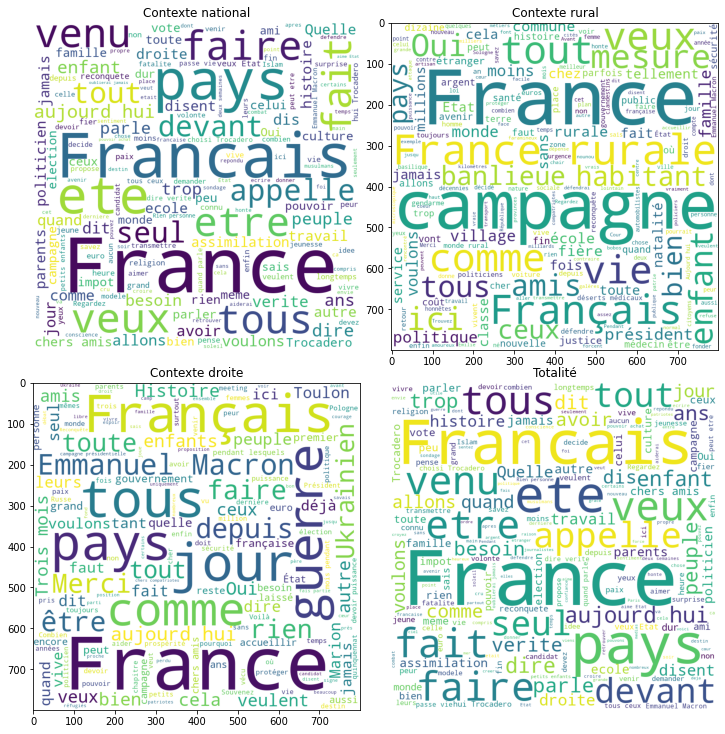

In [ ]:
size=10

wordcloud1 = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(texte1)
wordcloud2 = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(texte2)
wordcloud3 = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(texte3)
wordcloud4 = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(texte4)

#figure, (ax1,ax2) = plt.figure(4,figsize = (size, size))
fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2,2, figsize=(size,size))


ax1.imshow(wordcloud1)
ax1.set_title(cle1) 

ax2.imshow(wordcloud2) 
ax2.set_title(cle2) 

ax3.imshow(wordcloud3) 
ax3.set_title(cle3) 

ax4.imshow(wordcloud4)
ax4.set_title(cle4) 

ax1.axis("off") 
#ax2.axis("off") 
#ax3.axis("off") 
ax4.axis("off") 



plt.tight_layout(pad = 0) 

plt.savefig("Nuage de mots par clusters attendus.png") 
plt.show() 

In [ ]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
 


# Preprocessing data to lowercase all words and remove single punctuation words
nb=0
Dico_modele={}
Dico_vocab={}
for text in [texte1,texte2,texte3,texte4]:
  nom_base = ["Contexte national","Contexte rural","Contexte droite","Totalité"][nb]

  document=[nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(text)]

  data=[]


  for sent in document:
    new_sent = []
    for word in sent:
      new_word = word.lower()
      if (new_word not in french_stopwords) & (len(new_word)>2):
        new_sent.append(new_word)
        if len(new_word)<3:
          print(new_word)
 
    if len(new_sent) > 1:
      
      data.append(new_sent)

  # Creating Word2Vec
  model = Word2Vec(
  sentences = data,
  size = 50,
  window = 10,
  iter = 30,
  )
  Dico_modele[nom_base]=model
  Dico_vocab[nom_base]=vocab = list(model.wv.vocab.keys())
  nb+=1

In [ ]:
data

[['chers',
  'amis',
  'quelle',
  'joie',
  'bonheur',
  'quelle',
  'foule',
  'ciel',
  'quelle',
  'esperance',
  'voici',
  'etes',
  '100',
  '000',
  '100',
  '000',
  'francais',
  'reculent',
  'devant',
  'rien',
  '100',
  '000',
  'francais',
  'fiers',
  'pays',
  '100000',
  'francais',
  'veulent',
  'ecrire',
  'histoire',
  'voici',
  'etes',
  '100',
  '000',
  'reunis',
  'sous',
  'ciel',
  'bleu',
  'paris',
  'etes',
  'venus',
  'toutes',
  'villes',
  'tous',
  'villages',
  'france',
  'sais',
  'certains',
  'meme',
  'venus',
  'outre-mer',
  'etranger',
  'sais',
  'milliers',
  'policiers',
  'militaires',
  'gendarmes',
  'venus',
  'civil',
  'quatre',
  'coins',
  'france',
  'veux',
  'rendions',
  'hommage',
  'chers',
  'amis',
  'etes',
  '100',
  '000',
  'trocadero',
  'etes',
  'millions',
  'partout',
  'france',
  'metropole',
  'outre-mer',
  'etranger',
  'suivre',
  'aujourd',
  'hui',
  'fond',
  'sentez',
  'ici',
  'ecrit',
  'histoire',
 

In [ ]:
Dico_vocab.keys()

setA = set(Dico_vocab[list(Dico_vocab.keys())[0]])
setB = set(Dico_vocab[list(Dico_vocab.keys())[1]])
setC = set(Dico_vocab[list(Dico_vocab.keys())[2]])

print(setA & setB & setC)

intersection=list(setA & setB & setC)

{'france', 'ici', 'enfants', 'comme', 'tout', 'pays', 'tous', 'jamais', 'amis', 'fait', 'bien', 'quand', 'voulons', 'vie', 'oui', 'monde', 'campagne', 'veux', 'ceux'}


In [ ]:
intersection=[
 'enfants',
 'jamais',
 'monde',
 'oui',
 'france',
 'vie',
 'pays',
 'campagne',
 'ici',
 'voulons',
 'amis']

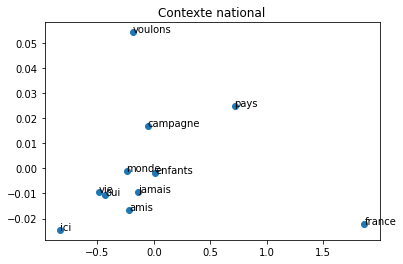

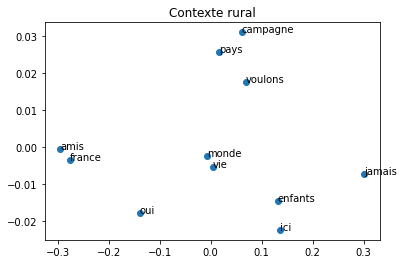

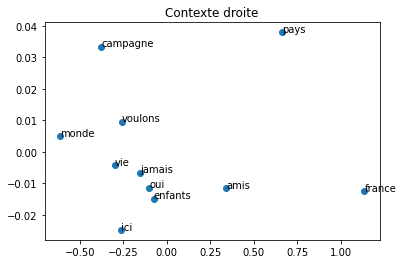

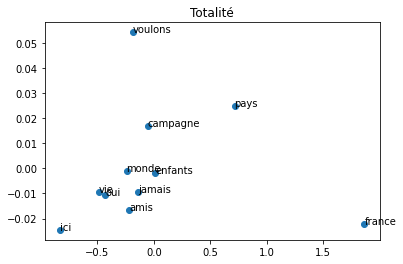

In [ ]:
voca=intersection

# Finding most similar words

#Visualizing data

"""
for w in voca[0:5]:
  print("3 words similar to", w)
  words = model.most_similar(w, topn=3)
  for word in words:
    print(word)
print()
"""

for i in list(Dico_modele.keys()):
  model=Dico_modele[i]
  X = model.wv[voca]
  pca = PCA(n_components=2)
  result = pca.fit_transform(X)
  
  pyplot.scatter(result[:, 0], result[:, 1])
  for j, word in enumerate(voca):
      pyplot.annotate(word, xy=(result[j, 0], result[j, 1]))
  plt.title(i)

  plt.show()
  

In [ ]:
for w in ["pays","campagne","enfants","amis"]:
  for i in list(Dico_modele.keys()):
    model=Dico_modele[i]
    
    print("Associations pour \"", w,"\":",i)
    words = model.most_similar(w, topn=3)
    for word in words:
      print(word)
    print()


Associations pour " pays ": Contexte national
('pouvoir', 0.9997831583023071)
('faire', 0.9997794032096863)
('francais', 0.9997775554656982)

Associations pour " pays ": Contexte rural
('veux', 0.999362587928772)
('tout', 0.999182403087616)
('communes', 0.999130129814148)

Associations pour " pays ": Contexte droite
('tout', 0.9997952580451965)
('france', 0.9997803568840027)
('accueillir', 0.9997695684432983)

Associations pour " pays ": Totalité
('pouvoir', 0.9997831583023071)
('faire', 0.9997794032096863)
('francais', 0.9997775554656982)

Associations pour " campagne ": Contexte national
('tout', 0.9998077154159546)
('pays', 0.9997768402099609)
('peuple', 0.9997351169586182)

Associations pour " campagne ": Contexte rural
('tout', 0.9992705583572388)
('pays', 0.9990757703781128)
('veux', 0.9989680647850037)

Associations pour " campagne ": Contexte droite
('tout', 0.9997699856758118)
('pays', 0.9997472763061523)
('comme', 0.9996830224990845)

Associations pour " campagne ": Totalité


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
Dico_modele.keys()

dict_keys(['Contexte national', 'Contexte rural', 'Contexte droite', 'Totalité'])

In [ ]:
vocabulaire

NameError: ignored

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('french'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TweetTokenizer()
# Tokenizing + removing stopwords


#contenu = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array
#contenu_init = df.content.apply(lambda x: x.replace("?",""))
#contenu=contenu_init.apply(lambda x: x.split(' ')).array
#text_data = list(contenu.apply(lambda x: list(filter(lambda a: a.lower() not in stopwords,tok.tokenize(x)))).array)


text_data = texte_tokenise[0].split(' ') #list(df.content.apply(lambda x: list(filter(lambda a: a.lower() not in stopwords,tok.tokenize(x)))).array)

text_data = list(df.content.apply(lambda x: list(filter(lambda a: a.lower() not in stopwords,tok.tokenize(x)))).array)


####

print(text_data[0])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

In [ ]:
len(en_stop)

In [ ]:
text_data[0:50]
stopwords

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')